# k-means notes, from Chapter 4 "Clustering" #

Start with a set of **N vectors x_i**, cluster them into **k groups**

c is an N-vector of the group assignments for each x_i (e.g. c1 = group number for vector x1)

G_j is the set of indices corresponding to group j

Each group has a group representative n-vector given by z_1...z_k

x_i is in group j=c_i, so z_ci is the representative vector for data vector x_i

We want the quantities ||x_i - z_ci|| **to be small**.

Jᶜˡᵘˢᵗ = (  sum(   norm(  x[i] - z[ c[i] ]  )^2   )  )/N   ; this is the sum of the mean square distance from the vectors to their associated representatives




**Method 1, fixed representatives:**

Select k group representatives, assign each vector xi to the representative it is closest to, i.e. min ||xi - zj||

**Method 2, fixed group assignments:**

For each group of vectors xi for i in Gj, the representatives that minimizes the norm squared is the *mean* aka *cluster centroid* aka *group centroid*

***Algorithm for k-means***

Step 1: Select k representatives randomly

Step 2: Assign vectors x_i to x_N to closest representative

Step 3: Update representatives by taking the mean of vectors assigned to it.

Step 4: Go back to step 2 until Jclust plateaus

Typically this "experiment" is run about 10 times with different starting representatives. It takes ~10-50 iterations to converge on average.

*Note that one interesting use of k-means is to guess missing values if you have a set of feature vectors where a few of them are missing entries. You can run k-means on the complete data and then find the nearest neighbor of the mystery vectors using only its known fields, then fill in the missing entries with entries in their group representatives. Another interesting use is topic discovery, found by inspecting the resulting clusters*


# k-means example application #

In [1]:
using Clustering, RDatasets, Plots

In [2]:
X = randn(10,2)

10×2 Matrix{Float64}:
 -0.39149     0.112029
  1.70002    -1.26154
  0.839925   -1.55226
  1.8496     -0.63522
  0.269344    0.434198
  1.19866    -0.122025
 -0.0226647  -1.27721
  0.515163    0.0393334
  0.368302   -0.762088
  1.83893     0.600631

In [3]:
Clustering.kmeans(X,2)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.39148996104326933 0.11202871917079012; 1.7000234495925333 -1.2615401621708178; … ; 0.36830185394328363 -0.7620883801918013; 1.8389332627748267 0.6006311252013966], [1, 2], [0.0, 0.0], [1, 1], [1, 1], 0.0, 0, true)

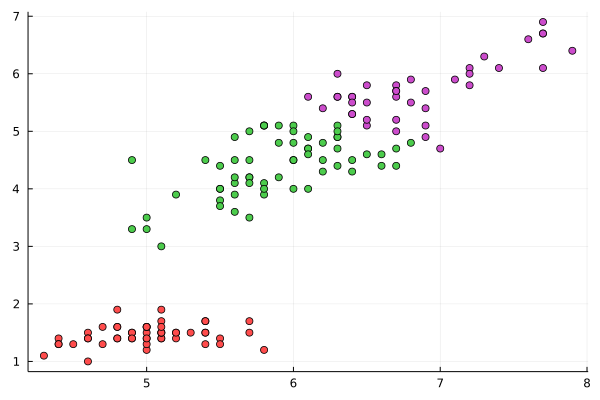

In [12]:
#Note that this a modified version (not an original idea) of a common example given for k-means, the iris data set
using RDatasets, Clustering, Plots
iris = dataset("datasets", "iris"); # load the data

## use Matrix to extract the data from the dataframe
## use ' to create the transpose
## use collect to create an array
features = Matrix(iris[:, 1:4])'; # features to use for clustering
result = kmeans(features, 3); # run k-means for 3 clusters

# plot with the points color mapped to the assigned cluster id
scatter(iris.SepalLength, iris.PetalLength, marker_z=result.assignments,
        color=:lightrainbow, legend=false)

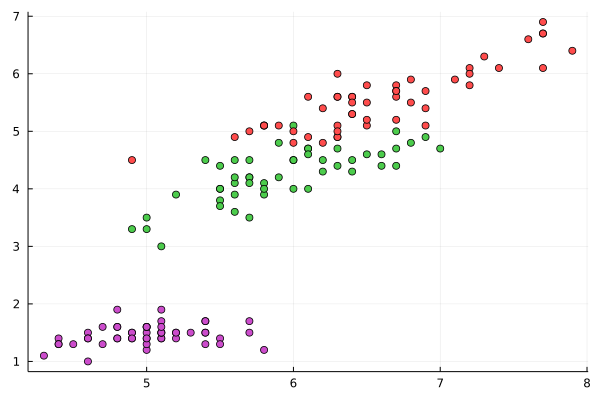

In [11]:
#now repeat plot with color mapped to the species to see if we have "discovered" the species with k-means
species_ids = vcat(ones(50)*1,ones(50)*2,ones(50)*3)
scatter(iris.SepalLength, iris.PetalLength, marker_z=species_ids,
        color=:lightrainbow, legend=false)